In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression()

In [4]:
x = np.arange(0,100)
y = np.sin(x/10)+np.random.randint(low=-2, high=2,size=100)/5 + 8

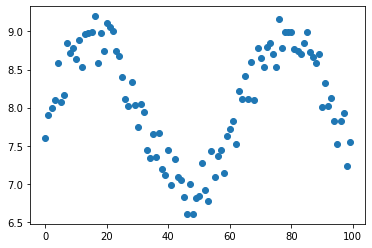

In [5]:
plt.scatter(x,y)

In [6]:
df = pd.DataFrame({
    'x':x,
    'y':y
})

In [7]:
df.head()

,x,y
0,0,7.600000
1,1,7.899833
2,2,7.998669
3,3,8.095520
4,4,8.589418


In [8]:
df.shape

(100, 2)

In [9]:
model.fit(df[['x']],df['y'])

LinearRegression()

In [10]:
print(model.coef_,model.intercept_)

[-0.00081033] 8.134585113383581


In [11]:
pred = model.predict(pd.DataFrame({'x':np.arange(0,100,2)}))

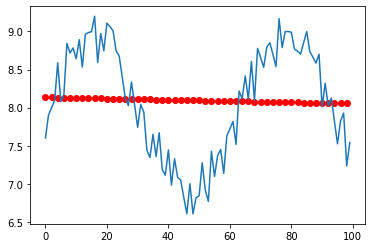

In [12]:
plt.plot(x,y)
plt.scatter(np.arange(0,100,2),pred,c='red')

In [13]:
df['x2'] = df['x']**2

In [14]:
df.head()

,x,y,x2
0,0,7.600000,0
1,1,7.899833,1
2,2,7.998669,4
3,3,8.095520,9
4,4,8.589418,16


In [15]:
model.fit(df[['x','x2']],df['y'])
print(model.coef_,model.intercept_)

[-0.03868158  0.00038254] 8.753148870983335


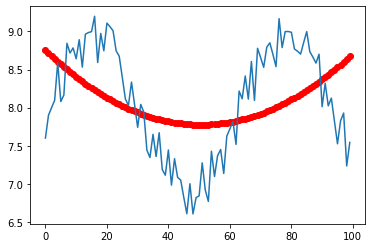

In [16]:
plt.plot(x,y)
plt.scatter(df['x'],model.predict(df[['x','x2']]),c='red')

In [17]:
df['cosx'] = np.cos(df['x']/10)
df.head()

,x,y,x2,cosx
0,0,7.600000,0,1.000000
1,1,7.899833,1,0.995004
2,2,7.998669,4,0.980067
3,3,8.095520,9,0.955336
4,4,8.589418,16,0.921061


In [18]:
model.fit(df.drop('y',axis=1),df['y'])
print(model.coef_,model.intercept_)

[-0.03900096  0.00039037  0.08221545] 8.746955387485503


<AxesSubplot:>

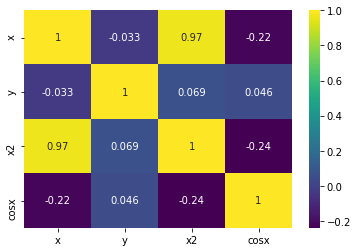

In [19]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

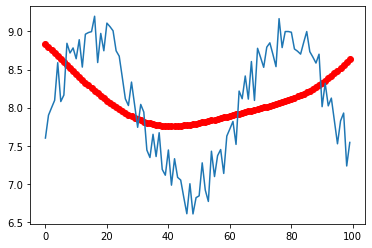

In [20]:
plt.plot(x,y)
plt.scatter(df['x'],model.predict(df.drop('y',axis=1)),c='red')

In [21]:
df['sinx'] = np.sin(df['x']/10)
df.head()

,x,y,x2,cosx,sinx
0,0,7.600000,0,1.000000,0.000000
1,1,7.899833,1,0.995004,0.099833
2,2,7.998669,4,0.980067,0.198669
3,3,8.095520,9,0.955336,0.295520
4,4,8.589418,16,0.921061,0.389418


<AxesSubplot:>

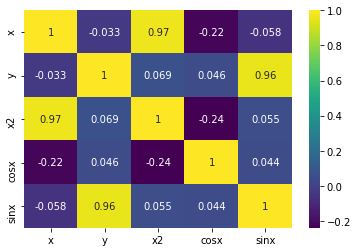

In [22]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [23]:
model.fit(df.drop('y',axis=1),df['y'])
print(model.coef_,model.intercept_)

[ 3.49605742e-03 -2.89163163e-05  6.57741242e-03  1.04765565e+00] 7.8213023897272596


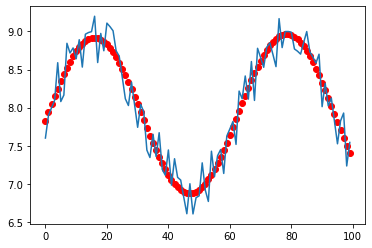

In [24]:
plt.plot(x,y)
plt.scatter(df['x'],model.predict(df.drop('y',axis=1)),c='red')

In [25]:
x = np.arange(0,100)
y = np.sin(x/10)+np.random.randint(low=-2, high=2,size=100)/5 + 8
df1 = pd.DataFrame({
    'x':x,
    'sinx':np.sin(x/10),
    'y':y
})

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(df1.drop('y',axis=1),df1['y'])

LinearRegression()

In [28]:
print(lm.coef_,lm.intercept_)

[0.00126234 0.99003462] 7.845372342019497


In [29]:
pred = model.predict(df.drop('y',axis=1))

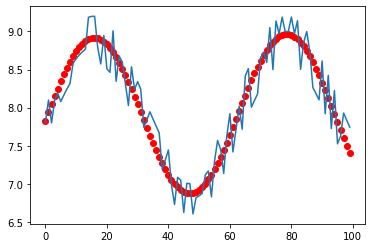

In [30]:
plt.plot(x,y)
plt.scatter(df['x'],pred,c='red')

In [31]:
from sklearn import metrics

In [32]:
print('MAE:',metrics.mean_absolute_error(y,pred))
print('MSE:',metrics.mean_squared_error(y,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y,pred)))
print('R2:',metrics.r2_score(y,pred))

MAE: 0.20616697513013527
MSE: 0.05455735503837942
RMSE: 0.233575159292206
R2: 0.8873128947043355


# 3D Plot

In [33]:
# z = 2*(x**2) + y**2 + 3*x*y + 4*x + 6

In [51]:
x = np.arange(-50,50,5)
y = np.arange(-50,50,5)

x_ = []
y_ = []
z_ = []

for i in x:
    for j in y:
        x_.append(i)
        y_.append(j)
        z_.append(2*(i**2) + j**2 + 3*i*j + 4*i + 6)


In [52]:
df = pd.DataFrame({
    'x':x_,
    'y':y_,
    'z':z_
})
df.head()

,x,y,z
0,-50,-50,14806
1,-50,-45,13581
2,-50,-40,12406
3,-50,-35,11281
4,-50,-30,10206


In [53]:
from mpl_toolkits.mplot3d import Axes3D

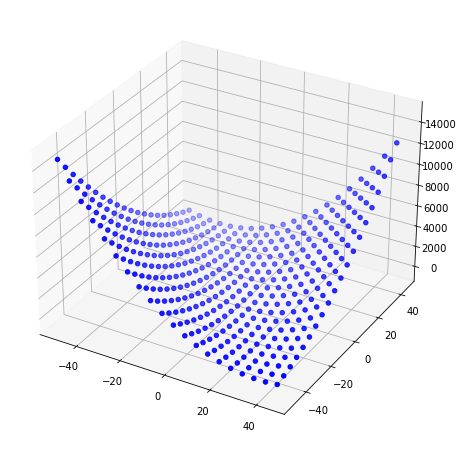

In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue',marker='o')
plt.show()

In [55]:
lm = LinearRegression()
lm.fit(df.drop('z',axis=1),df['z'])
print(lm.coef_,lm.intercept_)

[-13.5 -12.5] 2462.25


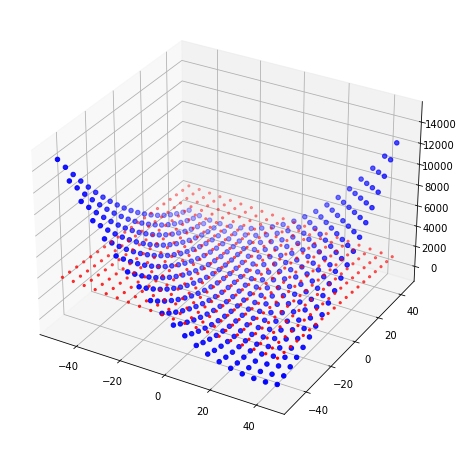

In [56]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue',marker='o')
ax.scatter(df['x'],df['y'],lm.predict(df.drop('z',axis=1)),c='red',marker='.')
plt.show()

In [57]:
df['x2'] = df['x']**2
df.head(3)

,x,y,z,x2
0,-50,-50,14806,2500
1,-50,-45,13581,2500
2,-50,-40,12406,2500


In [58]:
lm.fit(df.drop('z',axis=1),df['z'])
print(lm.coef_,lm.intercept_)

[ -3.5 -12.5   2. ] 812.2500000000016


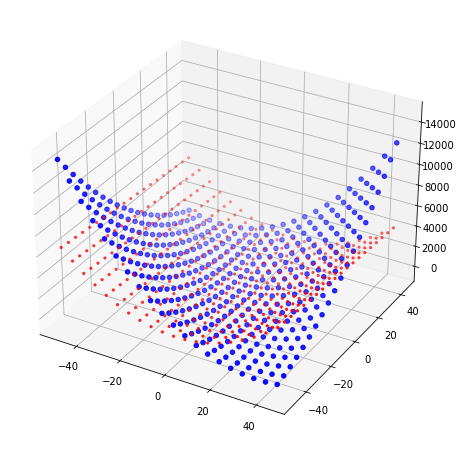

In [59]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue',marker='o')
ax.scatter(df['x'],df['y'],lm.predict(df.drop('z',axis=1)),c='red',marker='.')
plt.show()

In [60]:
df['xy'] = df['x']*df['y']

In [61]:
lm.fit(df.drop('z',axis=1),df['z'])
print(lm.coef_,lm.intercept_)

[ 4. -5.  2.  3.] 831.000000000002


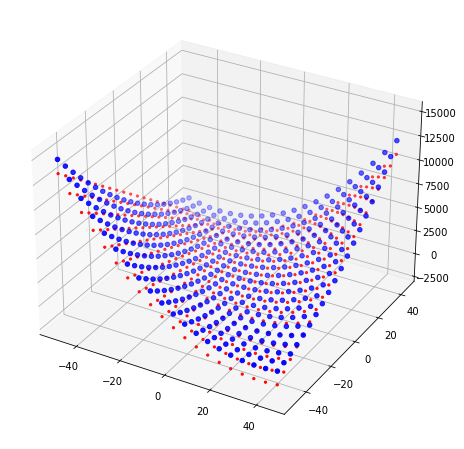

In [62]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue',marker='o')
ax.scatter(df['x'],df['y'],lm.predict(df.drop('z',axis=1)),c='red',marker='.')
plt.show()

In [63]:
df['y2'] = df['y']**2

In [64]:
lm.fit(df.drop('z',axis=1),df['z'])
print(lm.coef_,lm.intercept_)

[4.00000000e+00 5.77315973e-15 2.00000000e+00 3.00000000e+00
 1.00000000e+00] 6.0000000000009095


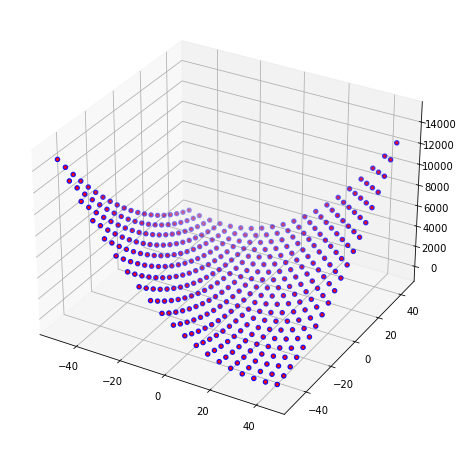

In [65]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue',marker='o')
ax.scatter(df['x'],df['y'],lm.predict(df.drop('z',axis=1)),c='red',marker='.')
plt.show()

<AxesSubplot:>

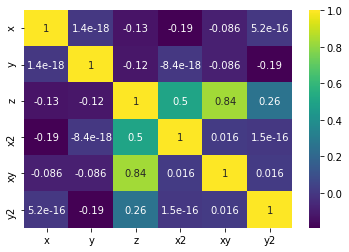

In [66]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)